# metaknowledge에 대한 소개

<hr>

* 문헌정보 분석을 해주는 파이썬 패키지인데, 파이썬 3.*만 지원한다. 
* 대상DB
  * Web of Science,PubMed, Scopus, ProQuest Dissertations & Thesis 
   * 이중에서 WoS만 테스트 해 봤다(BK)

* 논문 출처 : John McLevey,Reid McIlroy-Young(2017), Introducing metaknowledge: Software for computational research in information science, network analysis, and science of science, Journal of Informetrics 11, 176–197 

* 참고 
 * 만든 사람 : 캐나다 워털루 대학, 미국 시카고 대학 (University of Waterloo, Canada, University of Chicago, United States)
 * 랩 홈페이지 (http://networkslab.org/metaknowledge/)
 * 매뉴얼 (http://networkslab.org/metaknowledge/documentation/) 


In [1]:
# Test 
import sys
print(sys.version)

# 아래와 같이 파이썬 3.* 메시지가 등장하면 OK
# 3.6.0 | packaged by conda-forge | (default, Jan 14 2017, 00:31:55) [MSC v.1900 64 bit (AMD64)]

3.6.0 | packaged by conda-forge | (default, Jan 14 2017, 00:31:55) [MSC v.1900 64 bit (AMD64)]


# Ch3. 시작 

In [2]:
%matplotlib inline  
import os, time
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series

import metaknowledge as mk  # metaknowledge 불러옴 

# Ch4. 레코드 컬렉션 만들고 처리하기 

 * 데이타 수집방법
 * 레코드 : 한번에 500개씩 
 * 레코드 콘텐츠 : 상세정보 및 인용 문헌
 * 파일형식 : 일반 텍스트 

In [3]:
# Web of Science 파일 불러오기
# 주목해야 할 객체 : RecordCollection() <--- '레코드컬렉션' 이것을 주목하자 !!! 

t0    = time.time()

print(os.getcwd())
#path1 = 'C:\\Users\\owner\\Desktop\\raw_data'     # 디렉토리이름
#path1 = 'C:\\Users\\owner\\Desktop\\raw_data_lee' # 디렉토리이름
#path1 = "C:\\Users\\owner\\Desktop\\mission_20170131\\WoS Raw file\\P05"
path1 = 'C:\\Users\\owner\\Desktop\\WOS_DATA1' # 디렉토리이름

RC    = mk.RecordCollection(path1) 
print(RC)
print('>>> tags =', RC.tags())
#print(type(RC)) #<class 'metaknowledge.recordCollection.RecordCollection'>
t1    = time.time()
print('>>> %.2f seconds have passed'%(t1-t0))

C:\Users\owner\Desktop
RecordCollection(files-from-C:\Users\owner\Desktop\WOS_DATA1)
>>> tags = {'CR', 'SC', 'U1', 'BN', 'SE', 'DI', 'TI', 'RP', 'PI', 'ID', 'BP', 'TC', 'CL', 'CT', 'SO', 'VL', 'JI', 'PG', 'FU', 'PY', 'NR', 'EP', 'GA', 'IS', 'PT', 'FX', 'HO', 'DT', 'SI', 'DE', 'PU', 'PA', 'LA', 'EI', 'AB', 'AU', 'Z9', 'EM', 'UT', 'AR', 'U2', 'BE', 'RI', 'J9', 'C1', 'SN', 'SP', 'OI', 'CY', 'CA', 'SU', 'WC', 'AF', 'PM', 'PD', 'PN'}
>>> 0.07 seconds have passed


* 레코드컬렉션 vs 레코드
 * metaknowledge.RecordCollection class <--- metaknowledge.Record class

### RC 구조 파악하기
* RC는 집합(set)임
* Record 를 가지는데, 이게 사전형식임
 * 키가 'ID'를 가질때, 해당하는 값을 리턴해주고, 가지지 않을때는 그냥 []을 리턴시키는 방법
 * R.get('ID',[])
 * 참고 'ID'는 Keywords Plus® 를 나타냄
 * 태그의 내용 (https://images.webofknowledge.com/WOK50B6/help/WOS/h_fieldtags.html) 


In [6]:
i = 0
for R in RC:
    i += 1
    if i<5:
        if 'DEMOCRACY' in R.get('ID',[]):
            print(i, type(R), R.get('ID',[])) #<class 'metaknowledge.WOS.recordWOS.WOSRecord'>
            

    

2 <class 'metaknowledge.WOS.recordWOS.WOSRecord'> ['POLITICAL-PARTICIPATION', 'BROAD-BAND', 'COMMUNITY', 'DEMOCRACY', 'AMERICA', 'MEDIA', 'TECHNOLOGY', 'CITIZENS', 'TRUST', 'YOUTH']
3 <class 'metaknowledge.WOS.recordWOS.WOSRecord'> ['CONSENSUS CONFERENCE', 'BISPHENOL-A', 'KNOWLEDGE', 'SCIENCE', 'EXPERTISE', 'DEMOCRACY', 'POLITICS', 'SOCIETY', 'THINGS', 'CANADA']


# Ch5. 레코드 컬렉션 분석 방법

In [4]:
# 레코드 컬렉션에서 한개의 레코드 살펴보기 

print(RC.peek())

WOSRecord(Information and equity)


In [5]:
# pandas의 dataframe으로 만들기 : makeDict()

df = DataFrame(RC.makeDict())
print(df.columns)
print('length=', len(df.index))
print(df['PY'].unique())
print(df['PY'].value_counts())

Index(['AB', 'AF', 'AR', 'AU', 'BE', 'BN', 'BP', 'C1', 'CA', 'CL', 'CR', 'CT',
       'CY', 'DE', 'DI', 'DT', 'EI', 'EM', 'EP', 'FU', 'FX', 'GA', 'HO', 'ID',
       'IS', 'J9', 'JI', 'LA', 'NR', 'OI', 'PA', 'PD', 'PG', 'PI', 'PM', 'PN',
       'PT', 'PU', 'PY', 'RI', 'RP', 'SC', 'SE', 'SI', 'SN', 'SO', 'SP', 'SU',
       'TC', 'TI', 'U1', 'U2', 'UT', 'VL', 'WC', 'Z9', 'num-Authors',
       'num-Female', 'num-Male', 'num-Unknown'],
      dtype='object')
length= 596
[2002 2004 2014 2007 2000 2005 2008 2011 1998 2009 2015 2003 1987 1997 2013
 2001 1995 1993 2012 1996 2016 1999 1992 2010 1991 1989 2006 1990 1986 1994
 1988 2017]
2014    47
2012    43
2013    38
2005    35
2015    33
2010    33
2003    31
2016    29
2011    27
2009    27
2002    26
2008    24
2007    24
2004    24
2001    21
2006    20
1998    19
2000    15
1999    14
1997    13
1996    12
1995     7
1991     7
1993     6
1992     5
1987     4
1994     4
1989     3
1990     2
2017     1
1988     1
1986     1
Name: PY, dtype

In [6]:
#(cf) 엑셀 파일로 저장하기 
writer = pd.ExcelWriter("excel_out.xlsx", engine='xlsxwriter')
df.to_excel(writer,'Sheet1', encoding='utf-8') #.....2014.10.6 추가함 ...
writer.save()
print("OK")

OK


In [7]:
#(cf) 특정 키워드가 들어있는지 살펴보기 
#dftemp = df[ df['TI'].str.count('active material') > 0]
dftemp = df[ df['AB'].str.count('Korea') > 0]
print(len(dftemp.index))
#print(dftemp['TI'])
print(dftemp['AB'])

1
492    The recent tragedy of Fukushima has raised con...
Name: AB, dtype: object


In [13]:
# (cf) print title
print(df['TI'])

0                    DEMOCRACY DEMANDS SCIENCE-EDUCATION
1      Political determinants of electricity provisio...
2      Technological literacy: a multliteracies appro...
3      A celebration of difference: Science and democ...
4      Blunting Occam's razor: aligning medical educa...
5      A New Spin on Research Translation: The Boston...
6                                  Science and democracy
7      Innovating public participation methods: Techn...
8         The crisis of health in a crisis ridden region
9       A finite world, earth sciences, and public trust
10     The politics of talk: Coming to terms with the...
11     Science and the common good: Thoughts on Phili...
12     Kantian fractionalization predicts the conflic...
13     The march of unreason: Science, democracy, and...
14     The challenges of building cosmopolitan climat...
15     SCIENCE, TECHNOLOGY, AND NATIONAL-SECURITY IN ...
16     A model of Occupational Safety and Health Mana...
17     Governing the moral econ

### 5.1 시계열 데이타 분석 

In [8]:
# cf : Tests 

dic1 = RC.timeSeries('year')
dic2 = RC.timeSeries('journal')
#print(dic1)

'''
tiemSeries의 아규먼트를 잠깐 살펴보면 아래와 같군요. 

CollectionWithIDs.timeSeries(
tag=None, 
outputFile=None, 
giveYears=True, 
greatestFirst=True, 
limitTo=False, 
pandasMode=True):
Creates an pandas dict of the ordered list of all the values of tag, with and ranked by the year the occurred in, multiple year occurrences will create multiple entries. A list can also be returned with the the counts or years added or it can be written to a file.
If no tag is given the Records in the collection will be used

키 를  entry, count, year 를 가짐
    entry : 해당 필드의 정보 (ex) 'year', 'journal' 
    count : 카운팅수
    year  : 년도 표시
    
'''

#for i, each_key in enumerate(dic2.keys()):
#    print(">>>", i, each_key, dic2[each_key])

df_dic1 = DataFrame(dic1)
#print(df_dic1)
print(df_dic1[1:]) # slicing 
print("*"*30)
#print(df_dic1[::-1]) # 처음부터 끝까지, 뒤에서 부터 

    count  entry  year
1      29   2016  2016
2      33   2015  2015
3      47   2014  2014
4      38   2013  2013
5      43   2012  2012
6      27   2011  2011
7      33   2010  2010
8      27   2009  2009
9      24   2008  2008
10     24   2007  2007
11     20   2006  2006
12     35   2005  2005
13     24   2004  2004
14     31   2003  2003
15     26   2002  2002
16     21   2001  2001
17     15   2000  2000
18     14   1999  1999
19     19   1998  1998
20     13   1997  1997
21     12   1996  1996
22      7   1995  1995
23      4   1994  1994
24      6   1993  1993
25      5   1992  1992
26      7   1991  1991
27      2   1990  1990
28      3   1989  1989
29      1   1988  1988
30      4   1987  1987
31      1   1986  1986
******************************


*참고 : Seaborn: statistical data visualization : (http://seaborn.pydata.org/)

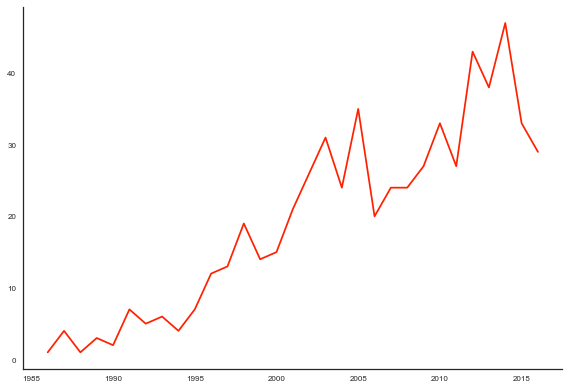

In [6]:
#df_growth = DataFrame(RC.timeSeries('year', outputFile='growth.csv'))[2:]
df_growth = DataFrame(RC.timeSeries('year'))[1:]

sns.set(font_scale=.8)
with sns.axes_style('white'):
    plt.plot(df_growth['year'],df_growth['count'], color='#ff2200')
    sns.despine()
    plt.tight_layout()
#plt.savefig('growth_chart.pdf')
#plt.show()


In [7]:
# Top 10 저널 찾기

df_growth2   = DataFrame(RC.timeSeries('journal', outputFile = 'growth.csv' ))[1:]
sr_journal   = df_growth2['entry'].value_counts()[:10] # 상위 10개 
journal_list = sr_journal.index.tolist()
#print('>>> journal list =', journal_list)
#print(">>> ")
#print(sr_journal)

# Top 10 추출 방법 : str.contains('패턴')
#df_journal_top_10 = df_growth2[ df_growth2['entry'].str.contains( '|'.join(journal_list)) ] 

# 그런데... exact word 만 추출할수는 없을까 ? 
def conditionExactWord(x, wordlist):
    if x in wordlist:
        return True
    else:
        return False

s_on_off = df_growth2['entry'].map(lambda x: conditionExactWord(x, journal_list) )
#print(">>> ", s_on_off)
df_journal_top_10 = df_growth2[ s_on_off  ] 
#print(df_journal_top_10)

sr_journal_top_10 = df_journal_top_10['entry'].value_counts()
print(sr_journal_top_10)

SOCIAL STUDIES OF SCIENCE                                  17
SOCIAL SCIENCE COMPUTER REVIEW                             14
ECOLOGICAL ECONOMICS                                       11
ISIS                                                        8
ISSUES IN SCIENCE AND TECHNOLOGY                            8
GLOBAL ENVIRONMENTAL CHANGE-HUMAN AND POLICY DIMENSIONS     7
SCIENCE                                                     7
HISTORY OF THE HUMAN SCIENCES                               6
JOURNAL OF AGRICULTURAL & ENVIRONMENTAL ETHICS              5
SCIENCE AND ENGINEERING ETHICS                              5
Name: entry, dtype: int64


In [8]:
#print(df_growth2)
#df_wide = pd.pivot_table(df_growth2, index=['year'], columns=['entry'])
df_wide = df_growth2.pivot(index='year', columns='entry')
#print(df_wide.fillna(0))
#df_wide.plot()

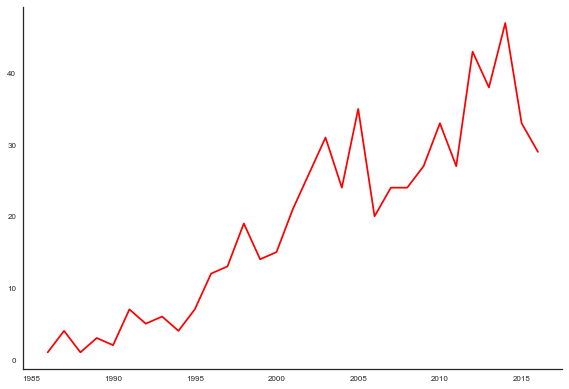

In [9]:
sns.set(font_scale=.8)
with sns.axes_style('white'):
    plt.plot(df_growth['year'],df_growth['count'], color='#ff0000')
    sns.despine()
    plt.tight_layout()

In [10]:
# 특정저널 데이타만 추출하기 

subset1 = ['SOCIAL STUDIES OF SCIENCE','SCIENCE']
df_growth_by_journal = DataFrame(RC.timeSeries('journal', limitTo = subset1 ))
print(df_growth_by_journal)

    count                      entry  year
0       2  SOCIAL STUDIES OF SCIENCE  2016
1       1                    SCIENCE  2016
2       2  SOCIAL STUDIES OF SCIENCE  2015
3       3  SOCIAL STUDIES OF SCIENCE  2014
4       3  SOCIAL STUDIES OF SCIENCE  2013
5       2  SOCIAL STUDIES OF SCIENCE  2012
6       1  SOCIAL STUDIES OF SCIENCE  2011
7       2  SOCIAL STUDIES OF SCIENCE  2010
8       1  SOCIAL STUDIES OF SCIENCE  2009
9       1                    SCIENCE  2009
10      1  SOCIAL STUDIES OF SCIENCE  2008
11      4  SOCIAL STUDIES OF SCIENCE  2007
12      1  SOCIAL STUDIES OF SCIENCE  2006
13      2  SOCIAL STUDIES OF SCIENCE  2005
14      1                    SCIENCE  2005
15      1  SOCIAL STUDIES OF SCIENCE  2004
16      1                    SCIENCE  2004
17      1  SOCIAL STUDIES OF SCIENCE  2003
18      2  SOCIAL STUDIES OF SCIENCE  2002
19      1                    SCIENCE  2002
20      1  SOCIAL STUDIES OF SCIENCE  2001
21      3                    SCIENCE  1998
22      2  

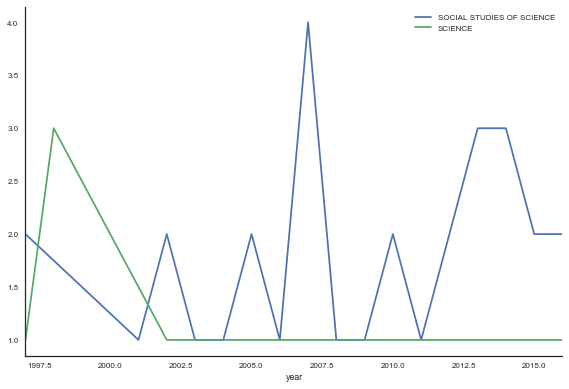

In [14]:
with sns.axes_style('white'):
    fig, ax = plt.subplots()
    df_growth_journal_1 = df_growth_by_journal[ df_growth_by_journal['entry'] == subset1[0]][::-1]
    df_growth_journal_2 = df_growth_by_journal[ df_growth_by_journal['entry'] == subset1[1]][::-1]
    df_growth_journal_1.plot(ax=ax, y='count', x='year', label = subset1[0])
    df_growth_journal_2.plot(ax=ax, y='count', x='year', label = subset1[1])
    sns.despine()
    plt.tight_layout()
#plt.savefig("growth_compare.pdf")
    

### 5.2 대충 보기  : glimpse() - 저자, 저널, 인용 

In [15]:
overview = RC.glimpse()
print(overview)


RecordCollection glimpse made at: 2017-02-02 19:58:54
596 Records from files-from-C:\Users\owner\Desk

Top Authors
1 Urpelainen, Johannes
1 Soderbaum, Peter
1 [Anonymous]
1 Brown, Mark B.
1 Spaiser, Viktoria
1 Ranganathan, Shyam
1 Sumpter, David J. T.
1 Macintosh, A
1 Smith, E

Top Journals
1 SOCIAL STUDIES OF SCIENCE
2 SOCIAL SCIENCE COMPUTER REVIEW
3 ECOLOGICAL ECONOMICS
4 ISIS
5 SCIENCE AND ENGINEERING ETHICS
5 ISSUES IN SCIENCE AND TECHNOLOGY
6 ELECTRONIC GOVERNMENT, PROCEEDINGS
7 SCIENCE
8 SOCIAL SCIENCE & MEDICINE

Top Cited
1 Irwin A, 2001, PUBLIC UNDERST SCI, V10, P1, DOI 10.1088/0963-6625/10/1/301
2 Collins HM, 2002, SOC STUD SCI, V32, P235, DOI 10.1177/0306312702032002003
3 Jasanoff Sheila, 2005, DESIGNS NATURE SCI D
3 Beck U., 1992, RISK SOC NEW MODERNI
4 Kitcher P., 2001, SCI TRUTH DEMOCRACY
4 Irwin A, 1996, MISUNDERSTANDING SCI
5 Irwin A, 2006, SOC STUD SCI, V36, P299, DOI 10.1177/0306312706053350
5 Stirling A, 2008, SCI TECHNOL HUM VAL, V33, P262, DOI 10.1177/016224390731

In [16]:
# 연도별 분리 

#RC0608 =  RC.yearSplit(2006,2008)
#RC0608 =  RC.yearSplit(2010,2015)
RC0608 =  RC.yearSplit(2000,2017)
df1    =  DataFrame(RC0608.makeDict())
print(df1.columns)
print(df1.shape)

Index(['AB', 'AF', 'AR', 'AU', 'BE', 'BN', 'BP', 'C1', 'CA', 'CL', 'CR', 'CT',
       'CY', 'DE', 'DI', 'DT', 'EI', 'EM', 'EP', 'FU', 'FX', 'GA', 'HO', 'ID',
       'IS', 'J9', 'JI', 'LA', 'NR', 'OI', 'PA', 'PD', 'PG', 'PI', 'PM', 'PN',
       'PT', 'PU', 'PY', 'RI', 'RP', 'SC', 'SE', 'SI', 'SN', 'SO', 'SP', 'SU',
       'TC', 'TI', 'U1', 'U2', 'UT', 'VL', 'WC', 'Z9', 'num-Authors',
       'num-Female', 'num-Male', 'num-Unknown'],
      dtype='object')
(498, 60)


### 5.3 gender 구하기 : genderStats()  
* 이런 기능이 있다는 것이 신기하군요(!)

{'Male': 431, 'Female': 198, 'Unknown': 556}
num-Authors    1186
num-Female      198
num-Male        431
num-Unknown     556
dtype: int64


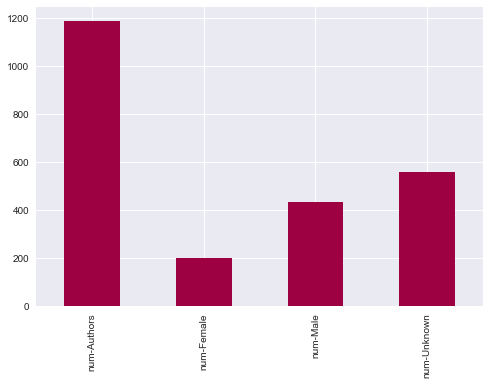

In [27]:
gender_breakdown = RC.genderStats()
print(gender_breakdown)
df_p = DataFrame(RC.makeDict())
print(df_p[['num-Authors','num-Female','num-Male','num-Unknown']].sum())

graph1 = df_p[['num-Authors','num-Female','num-Male','num-Unknown']].sum()

graph1.plot(kind='bar', colormap='Spectral', fontsize=10)

### 5.4 RPYS
#### 5.4.1 standard RPYS (?) 이것의 의미를 파악할 필요가 있음 (!!!)

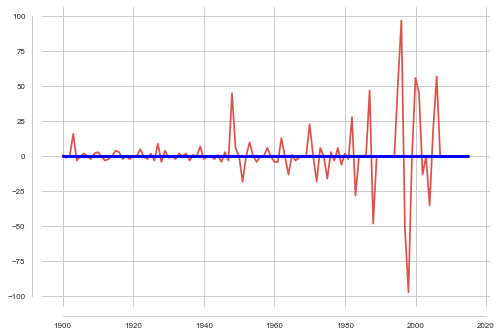

In [28]:
df_standard_results = RC.rpys(1900,2015)

dev_line_color    = sns.xkcd_rgb['pale red']

#style must be one of white, dark, whitegrid, darkgrid, ticks
#with sns.axes_style('white'):
with sns.axes_style('whitegrid'):
    plt.plot(df_standard_results['year'], df_standard_results['abs-deviation'], color = dev_line_color)
    #plt.plot([1900,2015],[0,0], linewidth=1, color = 'black')
    plt.plot([1900,2015],[0,0], linewidth=3, color = '#0000ff') # 가로선, x축(시작, 끝), y(시작, 끝) 
    sns.despine(offset=10, trim=True)
#plt.show()

In [9]:
# 특정연도에 인용이 된 참고문헌 

year_results = RC.getCitations('year', 1990) # 1970년도에 출판된 참고문헌 정보 
print(type(year_results))
#print(year_results)
#for i, each in enumerate(year_results.items()):
    #print('***', i, each[0], each[1])
    

<class 'dict'>


#### 5.4.2 Multi RPYS

In [30]:
minYear = 1950
maxYear = 2015

years = range(minYear, maxYear+1)

dic1 = {'CPY' :[],  # 인용하는 문헌의 연도 (?)
        'abs-deviation':[],
        'num-cites':[],
        'rank':[],   # 이것의 의미는 ? 
        'RPY':[]     # 인용된 문헌의 연도 (?)
       }


for each_year in years:
    try:
        RCyear = RC.yearSplit(each_year,each_year)# 연도 구간 지정 
        if len(RCyear) > 0:
            rpys        = RCyear.rpys(minYear=minYear,maxYear=maxYear)
            length      = len(rpys['year'])
            rpys['CPY'] = [each_year]* length
            
            dic1['CPY'] += rpys['CPY']
            dic1['abs-deviation'] += rpys['abs-deviation']
            dic1['num-cites']     += rpys['count']
            dic1['rank']          += rpys['rank']
            dic1['RPY']           += rpys['year']
    except:
        pass
    
df_multi_rpys = DataFrame.from_dict(dic1)
print(df_multi_rpys)

       CPY   RPY  abs-deviation  num-cites  rank
0     1986  1950              0          0     0
1     1986  1951              0          0     0
2     1986  1952              0          0     0
3     1986  1953              0          0     0
4     1986  1954              0          0     0
5     1986  1955              0          0     0
6     1986  1956              0          0     0
7     1986  1957              0          0     0
8     1986  1958              0          0     0
9     1986  1959              0          0     0
10    1986  1960              0          0     0
11    1986  1961              0          0     0
12    1986  1962              0          0     0
13    1986  1963              0          0     0
14    1986  1964              0          0     0
15    1986  1965              0          0     0
16    1986  1966              0          0     0
17    1986  1967              0          0     0
18    1986  1968              0          0     0
19    1986  1969    

In [31]:
hm_table = df_multi_rpys.pivot('CPY','RPY', 'rank')
print(hm_table)

RPY   1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  ...   2006  \
CPY                                                               ...          
1986     0     0     0     0     0     0     0     0     0     0  ...      0   
1987     0     0     0     0     0     0     0     0     0     0  ...      0   
1988     0     0     0     0     0     0     0     0     0     0  ...      0   
1989     0     0     0     0     0     0     0     0     0     0  ...      0   
1990     0     0     0     0     0     0     0     0     0     0  ...      0   
1991     0     0     0     0     0     0     0     0     0     0  ...      0   
1992     0     0     0     0     0     0     0     0     0     0  ...      0   
1993     0     0     0     0     0     0     0     0     0     0  ...      0   
1994     0     0     0    56     0     0     0     0     0     0  ...      0   
1995     0     0     0     0     0     0     0     0     0     0  ...      0   
1996    56     0     0     0     0     0

C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


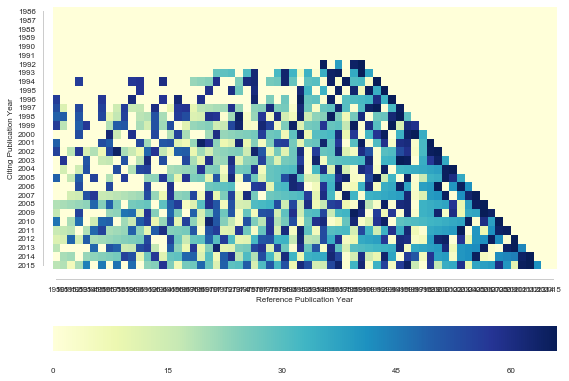

In [32]:
with sns.axes_style('whitegrid'):
    sns.heatmap(hm_table, square = False, cmap = 'YlGnBu', cbar_kws ={'orientation': 'horizontal'})
    plt.xlabel('Reference Publication Year', size=8)
    plt.ylabel('Citing Publication Year',size=8)
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
#plt.show()
#plt.savefig('rpys_multi.pdf')

### 5.5. Computational text analysis  : 
###### <font color ="#ff0000">설명이 부족함 </font>

In [ ]:
# 사용한 모듈 : NLTK, pyLDAvis, gensim 

stop_words = ['list', 'of', 'words','to', 'remove', 'from', 'abstracts']

RC.forNLP('topic_model/', 
          dropList = stop_words, 
          lower          = True, 
          removeNumbers  = True, 
          removeNonWords = True,
          removeWhitespace = True,
          removeCopyright  = False,
          stemmer          = None)
         





In [ ]:
# pyLDAvis 임포트 되지 않음. 윈도우즈에서 작동가능한지 확인필요함 

#import pyLDAvis

# Ch 6. 네트워크 

* 10개 네트워크 생성 함수 제공함 
** 3가지 조건  (1)에지 문턱   (2)디그리 문턱  (3) 카운트 문턱  dropEdges(), dropNodesByDegree(), dropNodesByCount()
** 제거 가능한 예 : 셀프 루프를 구성하는 에지들을 제거할 수 있음, 고립된 것들(isolate)

* 평가
** networkx 모듈을 좀 알면 이해하는데 도움됨
** <class 'networkx.classes.graph.Graph'> 이 클래스에 대해서 좀 알면 도움을 받을 듯함


### 6.1 Co-authorship 

* 어떤 기준으로 저자 이름을 처리할 것인가? 
* 원리 : 저자 전체 이름 기준. 미들 네임도 포함함. (이것은 아주 엄격한 방법임)
* 문제 : 단일 저자이름이 복수저자로 될수 있음
 * 그런데, 저자 이름 이니셜 기준으로 할 경우의 문제점은 다수 저자이름이 단일 저자로 묶일수 있음

In [33]:
co_author_network = RC.networkCoAuthor()
print(">>> type(co_author_network) = ", type(co_author_network))
print(mk.graphStats(co_author_network)) # 네트워크 통계값 제공해줌 

import datetime
current_time = datetime.datetime.now().time()
print("OK ", current_time)
#(example)
#Nodes: 769
#Edges: 1613
#Isolates: 7
#Self loops: 0
#Density: 0.00546232
#Transitivity: 0.857401  <--- 이건 뭐죠?  

>>> type(co_author_network) =  <class 'networkx.classes.graph.Graph'>
Nodes: 1117
Edges: 1450
Isolates: 302
Self loops: 1
Density: 0.00232638
Transitivity: 0.986421
OK  20:14:11.492820


In [34]:
# 문턱값 적용 예제

# 에지 값이 2 미만 제거( <2),  셀프 루프 제거 
#THRESHOLD_EDGE = 2 
THRESHOLD_EDGE = 1 

mk.dropEdges(co_author_network, minWeight=THRESHOLD_EDGE, dropSelfLoops = True) 
# (BK)이런식으로 아규먼트에 들어가는 객체를 변경시키는 방법을 사용할 때는 조심해야 할 것임..

giant_network = max(nx.connected_component_subgraphs(co_author_network), key = len )
print('>>> type(giant_network)=', type(giant_network))  # <class 'networkx.classes.graph.Graph'>
for i, each in enumerate(giant_network):
    print(i, each, type(each)) #(ex)Dunn, Martin L. <class 'str'>

# 아이겐벡터 centrality  계산해 내기
eigen_vector_centrality = nx.eigenvector_centrality(giant_network)# 사전형 리턴해 줌 
print(">>> type(eigen_vector_centrality) = ", type(eigen_vector_centrality))
for i, each in enumerate(eigen_vector_centrality.items()):
    print(i, each[0], each[1])



>>> type(giant_network)= <class 'networkx.classes.graph.Graph'>
0 McDermott, Rose <class 'str'>
1 Norgaard, Asbjorn Sonne <class 'str'>
2 Martin, Nicholas G. <class 'str'>
3 Dawes, Christopher T. <class 'str'>
4 Littvay, Levente <class 'str'>
5 Magnusson, Patrik K. E. <class 'str'>
6 Christensen, Kaare <class 'str'>
7 Verhulst, Brad <class 'str'>
8 Medland, Sarah E. <class 'str'>
9 Klemmensen, Robert <class 'str'>
10 Klofstad, Casey A. <class 'str'>
11 Hatemi, Peter K. <class 'str'>
12 Oskarsson, Sven <class 'str'>
13 Johannesson, Magnus <class 'str'>
14 Eaves, Lindon J. <class 'str'>
>>> type(eigen_vector_centrality) =  <class 'dict'>
0 McDermott, Rose 0.2581988897471611
1 Norgaard, Asbjorn Sonne 0.2581988897471611
2 Martin, Nicholas G. 0.2581988897471611
3 Dawes, Christopher T. 0.2581988897471611
4 Littvay, Levente 0.2581988897471611
5 Magnusson, Patrik K. E. 0.2581988897471611
6 Christensen, Kaare 0.2581988897471611
7 Verhulst, Brad 0.2581988897471611
8 Medland, Sarah E. 0.258198889

C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

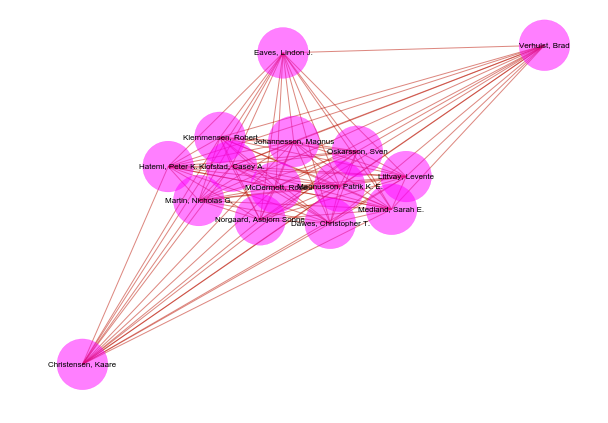

In [35]:
size = [ 10000* eigen_vector_centrality[node] for node in giant_network]
# node에는 저자 이름이 들어감. 저자별 아이겐벡터 중앙값에 대해서 2000을 곱해줌.
# 왜 그랬을까요? 아래를 보니 노드 크기를 정해주기 위해서 그랬군요. 

# 그래프 생성
nx.draw_spring(giant_network,
               node_size   = size,
               with_labels = True,
               font_size   = 8,
               node_color  = "#ff00ff",
               edge_color  = "#bb1100",
               alpha = .5)
#plt.show()        



In [38]:
# community 모듈 
# 설치할 때 좀 조심해야 함( pip install 로 설치가 된다고 되어 있지만, 설치 되지 않음)(2007/1/25) 
# https://bitbucket.org/taynaud/python-louvain/ 에 접근하여, 3개 파일 복사해 옴 

import community

partition  = community.best_partition(giant_network)
print(">>> type(partition) :", type(partition), partition) # 사전 형식임 
print(">>> partition ")
for i, each in enumerate(partition.items()):
    print(i, each[0], each[1])
modularity = community.modularity(partition, giant_network)
print('>>> Modularity:', modularity)


>>> type(partition) : <class 'dict'> {'McDermott, Rose': 0, 'Norgaard, Asbjorn Sonne': 0, 'Martin, Nicholas G.': 0, 'Dawes, Christopher T.': 0, 'Littvay, Levente': 0, 'Magnusson, Patrik K. E.': 0, 'Christensen, Kaare': 0, 'Verhulst, Brad': 0, 'Medland, Sarah E.': 0, 'Klemmensen, Robert': 0, 'Klofstad, Casey A.': 0, 'Hatemi, Peter K.': 0, 'Oskarsson, Sven': 0, 'Johannesson, Magnus': 0, 'Eaves, Lindon J.': 0}
>>> partition 
0 McDermott, Rose 0
1 Norgaard, Asbjorn Sonne 0
2 Martin, Nicholas G. 0
3 Dawes, Christopher T. 0
4 Littvay, Levente 0
5 Magnusson, Patrik K. E. 0
6 Christensen, Kaare 0
7 Verhulst, Brad 0
8 Medland, Sarah E. 0
9 Klemmensen, Robert 0
10 Klofstad, Casey A. 0
11 Hatemi, Peter K. 0
12 Oskarsson, Sven 0
13 Johannesson, Magnus 0
14 Eaves, Lindon J. 0
>>> Modularity: 0.0


C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

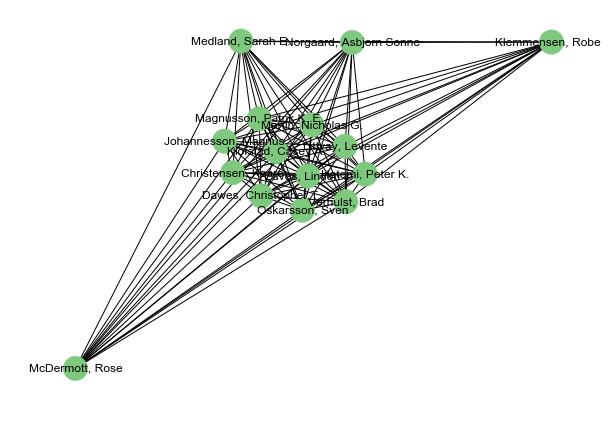

In [39]:
colors = [partition[n] for n in giant_network.nodes()]
degSize = 200.*3.  # 노드 크기

nx.draw_spring(giant_network,
               with_labels = True,
              node_color = colors,
              cmap=plt.cm.Accent,
              node_size=degSize)
#plt.savefig('coauthors_community.pdf', bbox_inches='tight')
#plt.show()


### 6.2. citation, co-citation, bibliographic coupling networks

* (1) citation 
* (2) co-citation (Small, 1973)
* (3) bibliographic coupling  (Kessler, 1963)
** 유니크한 값을  저자, 연도, 저널로 구성 (이게 유니크한 값이 될 수 있는가 ?)




>>> Begin

>>> type(document_cite):  <class 'networkx.classes.digraph.DiGraph'>
Nodes: 5788
Edges: 6047
Isolates: 0
Self loops: 0
Density: 0.000180534
Transitivity: 0.000129867


C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

>>> End


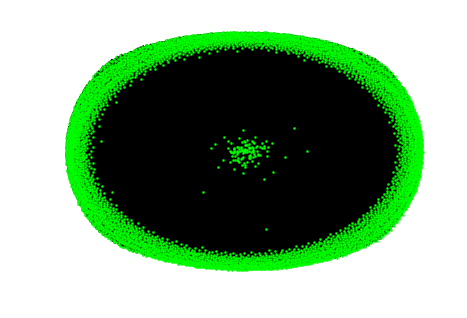

In [5]:
#(1) citation 
print(">>> Begin")
RC_1 =  RC.yearSplit(2013,2015) # 2006 --- 2007 까지 값 
#RC_1 =  RC # Dr Lee 
document_cite = RC_1.networkCitation()
print(document_cite)
print(">>> type(document_cite): ", type(document_cite))
#print(document_cite)
print(mk.graphStats(document_cite))

# visualize 1

nx.draw_spring(document_cite, 
               with_labels = False,
               node_color = "#00ff00",
               node_size   = 5)
print(">>> End")
#plt.show()

>>> Begin
>>> modularity2 =  0.17895362663495837
>>> End


C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

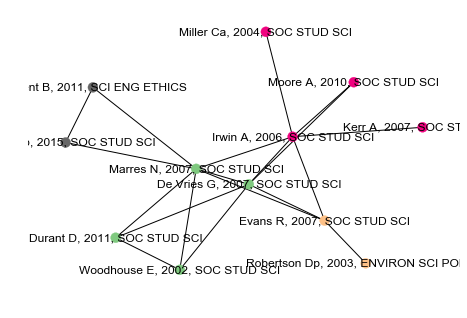

In [10]:
#(2) co-citation

import community

print(">>> Begin")
RC_2 =  RC.yearSplit(2001,2016) #
#RC_2 =  RC

document_cocite = RC_2.networkCoCitation(coreOnly = True )
#mk.dropEdges(document_cocite, minWeight = 1)
mk.dropEdges(document_cocite, minWeight = 0)
# visualize 2
giant2  = max(nx.connected_component_subgraphs(document_cocite), key = len)
partition2  = community.best_partition(giant2)
modularity2 = community.modularity(partition2, giant2 )
print(">>> modularity2 = ", modularity2)

colors = [partition2[n] for n in giant2.nodes()]

nx.draw_spring(giant2,
              node_color  = colors,
              with_labels = True,
              cmap        = plt.cm.Accent,
              node_size   = 100)
print(">>> End")
#plt.show()

*(3) co-citation  : journal  
 * 시간 많이 소비되니 조심
 * 소스 코드에서 URL 정보를  업데이트 시켜줌 
  * "J9 Database empty or missing, to regenerate it import and 
  * run metaknowledge.WOS.journalAbbreviations.updatej9DB().")

 * backend.py 수정함 
  * def j9urlGenerator(nameDict = False): 함수속에 있는 URL 을 아래와 같이 변경함 
  * 주소 수정 : (http://images.webofknowledge.com/WOK46P9/help/WOS/A_abrvjt.html)

In [ ]:
print(">>> Begin")
      
RC_3           =  RC.yearSplit(2008,2010) #
#RC_3            =  RC


journal_cocite  =  RC_3.networkCoCitation(nodeType = 'journal')
mk.dropEdges(journal_cocite, minWeight = 1)

# visualize 
giant3      = max(nx.connected_component_subgraphs(journal_cocite), key = len)
partition3  = community.best_partition(giant3)
modularity3 = community.modularity(partition3, giant3)
print(">>> modularity3=", modularity3)

colors = [partition3[n] for n in giant3.nodes()]

nx.draw_spring(giant3,
              node_color  = colors,
              #with_labels = True,
              with_labels = False,
              cmap        = plt.cm.Accent,
              node_size   = 10)
#plt.savefig('cocite_uniform_community.pdf', bbox_inches='tight')
#plt.show()
print(">>> End")

In [ ]:
# A 부터 Z까지 

import string
string.ascii_uppercase

### 6.3  공동-연구자, 공동-연구기관 네트워크 

* GrantCollection을 사용함 . 입력 데이터를 어디서 구할 수 있는지 확인이 필요함 !!!



### 6.4  one-mode networks 
* co-occurrence 에 기초함 

>>> type(keywords)= <class 'networkx.classes.graph.Graph'>
976
>>> modularity =  0.5193877459799944


C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

>>> 6.05 haves passed


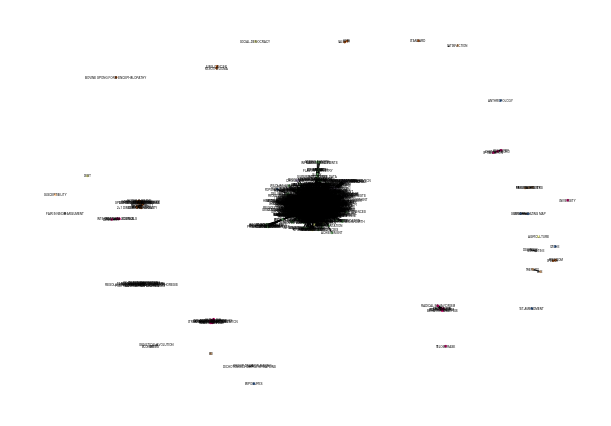

In [10]:
import time
import community

t1 = time.time()

# 4가지 네트워크 생성기
#RC_kw    = RC.yearSplit(2006,2007)
RC_kw    = RC

keywords = RC_kw.networkOneMode('keywords')

print(">>> type(keywords)=", type(keywords))
#print(keywords.nodes())
print(keywords.number_of_nodes())



partition  = community.best_partition(keywords)
modularity = community.modularity(partition,keywords)
print(">>> modularity = ",modularity)
colors = [partition[n] for n in keywords.nodes()]
nx.draw_spring(keywords,
               node_color  = colors,
               with_labels = True,
               #with_labels = False,
               cmap        = plt.cm.Accent,
               font_size   = 3,
               node_size   = 5 )

#plt.savefig('keywords5.pdf', bbox_inches='tight')

t2 = time.time()
print(">>> {:.2f} haves passed".format(t2-t1))

### 6.5. Two-mode networks

>>> type(two_mode)= <class 'networkx.classes.graph.Graph'>


C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

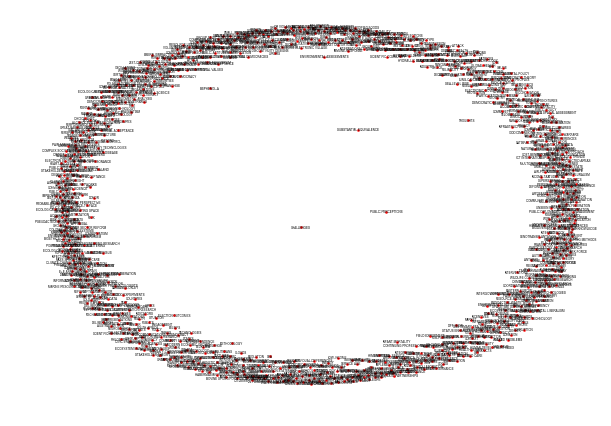

In [4]:
#RC_two_mode = RC.yearSplit(2008,2010)
RC_two_mode = RC
two_mode    = RC_two_mode.networkTwoMode('keywords','authorFull')

print(">>> type(two_mode)=", type(two_mode))
#print(two_mode.nodes())

mk.graphStats(two_mode)

nx.draw_spring(two_mode,
               #node_color  = colors,
               with_labels = True,
               #with_labels = False,
               cmap        = plt.cm.Accent,
               font_size   = 3,
               node_size   = 5 )
#plt.savefig('two_mode.pdf', bbox_inches='tight')

### 6.6. Multi-mode networks

* 3개 이상의 모드 (?) 이게 얼마나 효과가 있는지 확신할 수 없지만 ...

### 6.7. Multi-level networks
* 연구자 - multi-level network analysis 
 * Bellotti, 2012; 
 * Bellotti, Guadalupi, & Conaldi, 2016; 
 * Lazega, Jourda, Mounier,& Stofer, 2008; 
 * Wang, Robins, Pattison, & Lazega, 2013)

C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Anaconda2\envs\python3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Anaconda2\envs\python3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

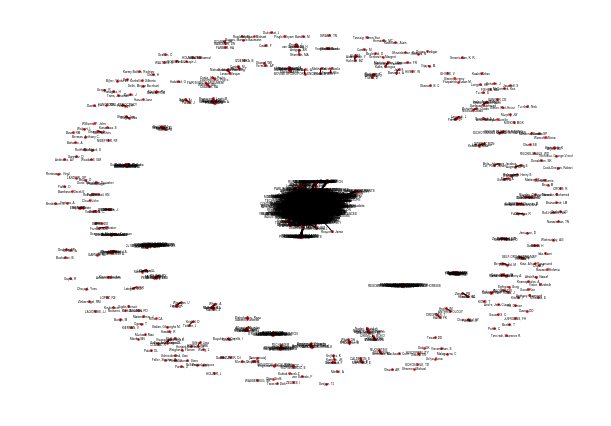

In [5]:

multi_level = RC.networkMultiLevel('keywords','authorsFull')

nx.draw_spring(multi_level,
               #node_color  = colors,
               with_labels = True,
               #with_labels = False,
               cmap        = plt.cm.Accent,
               font_size   = 3,
               node_size   = 5)
#plt.savefig('multi_level2.pdf', bbox_inches='tight')

### 6.8  네트워크 파일 저장하기 

사실 networkx 에서 제공하는 파일저장방법이 있다.  
그런데 McLevey 는 기존 방법이 대용량 데이타 처리에서 속도가 느리다고 판단하고,
csv 파일 형식으로 저장하는 방법(writeGraph)을 제공한다.

 * <font color="#ff0000"> mk.writeGraph(그래프 객체, 파일명)</font>

 * csv 파일 형식 파일을 저장
 * (1)_edgeList, (2)_nodeAttributes 접미어(suffix)가 뒤에 따라 붙는 2개 파일을 생성시킴
 * 결과 파일은 R에서 불러오는 것에 적합하게 되었다고 함.


아래에서 metaknowledge에서 제공하는 writeGraph()와 networkx에서 제공하는 write_pajek()의 성능을 비교해 보자.
노드갯수가 작은 경우는 거의 차이가 나지 않는다. 

In [ ]:
import time
G = multi_level
print( ">>> Number of nodes = ", G.number_of_nodes())
#help(mk.writeGraph)

# 시간계산 
t1 = time.time()
mk.writeGraph(G, 'melti_level_csv')
#csv 파일 형식 파일을 저장: (1)_edgeList, (2)_nodeAttributes 접미어(suffix)가 뒤에 따라 붙는 2개 파일을 생성시킴
#결과 파일은 R에서 불러오는 것에 적합하게 되었다고 함. 
t2 = time.time()
t3 = t2-t1
print("metaknowledge : t2-t1=",t3)

# 시간계산 
t1 = time.time()
nx.write_pajek(G, 'test.net')
t2 = time.time()
t4 = t2-t1
print(">>> networkx : t2-t1= ",t4)
print(">>> metaknowledge - networkx = {:.2f} seconds".format(t4-t3))

import glob
print(glob.glob("*.csv"))
print(glob.glob("*.net"))




# Ch 7. Interactive 데이터 가시화

* 놀라운 기능이군요. D3.js를 지원합니다. 그런데 왜 작동이 되지 않는 것일까요 ?
* mkD3 자바스크립트 라이브러리 -- metaknowledge에서 생성한 데이터셑을 입력받아서 D3.js 그래프를 생성함
* mkD3에서 현재 지원하는 기능
 * interactive networks
 * standard RPYS
 * multi RPYS 그래프

* 참고 : D3.js graphs (Bostock, Ogievetsky, & Heer, 2011)

import mkD3

그런데 설치가 되지를 않군(2017.2.1) 


# Ch 8. Advanced Usage


* (1) 필터링 RecordCollections
* (2) 대용량 데이터 처리 

### 8.1 필터링 RecordCollections

* RecordCollections은 mutable sets 임


In [41]:
RC_filtered = mk.RecordCollection() # 

for R in RC :
    if 'DEMOCRACY' in R.get('ID', []) :  # 'ID'가 키값에 있으면 'ID'를 없다면 [] 를 리턴해줌 
        RC_filtered.add(R)

df_filtered = DataFrame(RC_filtered.makeDict())
print(df_filtered.shape)
print(df_filtered.head())

# 판다스로 변환한 후 맵 람브다 함수를 만들어서 해당조건에 맞는 row 값만 추출할 수 도 있는데, 
# 이런 방법을 구현해 놓았군요. 

(96, 55)
                                                  AB  \
0                                               None   
1  Since late 2010, the Arab world has entered a ...   
2  Food as a human right was first laid down 50 y...   
3  We present a model or the distribution or labo...   
4  Social studies on biobanking have traditionall...   

                                                  AF    AR  \
0                           [Lievrouw, LA, Farb, SE]  None   
1  [Batniji, Rajaie, Khatib, Lina, Cammett, Melan...  None   
2                             [Haddad, L, Oshaug, A]  None   
3              [De Langhe, Rogier, Greiff, Matthias]  None   
4  [Canada, Jose A., Tupasela, Aaro, Snell, Karol...  None   

                                                  AU   BP  \
0                           [Lievrouw, LA, Farb, SE]  499   
1  [Batniji, R, Khatib, L, Cammett, M, Sweet, J, ...  343   
2                             [Haddad, L, Oshaug, A]  329   
3                          [De Langhe

### 8.2 대형 네트워크 처리

* 메모리 소비를 줄이기 위해서
 * (1) Citation 객체 사용시. FAST_CITES 플래그 사용하면, 메모리 소비 대략 70%(?)까지 줄여줌
 * (2) mergeGraphs() : 정보 손실 없이 2개 네트워크 결합시켜줌.
  * 큰 그래프를 그리기 보다는, 작은 그래프를 그린 후 이들을 합치는 방법이 메모리 소비를 줄여줌

# Ch9 결론

* "자화자찬"으로 결론을 짓고 있군요.
 * 진입장벽이 좀 높겠지만, 파이썬을 조금 배우면 왠만한 것은 다 할 수 있다고 자찬함
 * 입력 데이타(Web of Science, PubMed, Scopus, ProQuest ..)에서 RecordCollections, GrantCollections 를 만들어 냄
 * 다른 파이썬 패키지, R 과 연계될수 있기에, 전문적인 과학계량학 연구 소프트웨어 보다 뛰어남.
  * Pajek, Gephi, VOSViewer, D3.js 등과 연동되는 데이터생성시켜줌
 * 컴퓨팅 속도를 증가시켜주는 캐시 데이터셋을 가짐
 * 무엇보다도 공개 소스(open source)임. 소스코드 재가공 가능. 
 